# Load Italy dataset

In [2]:
import pandas as pd
import pickle
from data_structure import OD_tree, GeoSpine

file_path = '../data/Italy'
df = pd.read_csv(file_path + '/data.csv')

with open(file_path + '/structure/geo_spine.pickle', 'rb') as f:
    spine = pickle.load(f)
spine = GeoSpine(spine)
tree = OD_tree(df, spine)

# Histogram and sparsity

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import os

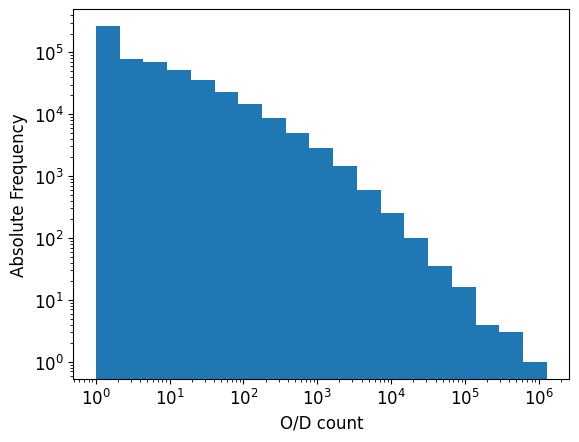

In [70]:
tree_level = tree.depth
geo_level = int(tree_level / 2)
data = tree.get_data_at_level(tree_level)
# plot histogram
x_values = data["COUNT"].values
log_bins = np.logspace(np.log10(x_values.min()), np.log10(x_values.max()), num=20)

# Crea l'istogramma con scala logaritmica
plt.hist(x_values, bins=log_bins, density=False)

# Imposta la scala logaritmica per l'asse x
plt.xscale('log')
plt.yscale('log')
plt.xlabel("O/D count", fontsize=12)
plt.ylabel("Absolute Frequency", fontsize=12)
# change size of the ticks of the axes
plt.tick_params(axis='both', which='major', labelsize=12)

# save the plot
folder = "../plots/Italy/additional"
if not os.path.exists(folder):
    os.makedirs(folder)
plt.savefig(f"{folder}/histogram_OD_{geo_level}.png")
plt.show()

In [69]:
# compute total number of O/D pairs
number_OD = len(spine.get_nodes(geo_level))
print("Number of areas at geo level {}: {}".format(geo_level, len(spine.get_nodes(geo_level))))
print(f"Total number of O/D pairs at geo level {geo_level}: {number_OD**2}")
print(f"Number of O/D pairs with data: {len(data)}")
print("Sparsity: {:.2f}%".format(100-100 * len(data) / (number_OD**2)))

Number of areas at geo level 3: 8092
Total number of O/D pairs at geo level 3: 65480464
Number of O/D pairs with data: 556120
Sparsity: 99.15%
